### **Parte 1**

- Descarga de la lista de las 500 empresas <br>
- Limpieza de datos para su procesamiento <br>
- Visualización de sectores <br>
- Cantidad de empresas por sector <br>
- Cantidad de empresas por sector por fecha de ingreso <br>
- Porcentaje de empresas por sector por fecha de ingreso


In [38]:
#Librerias requeridas:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [39]:
#Descarga de la lista de las 500 empresas dentro del indice S&P 500
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
df_SP500 = pd.read_html(url)[0]

In [40]:
df_SP500.head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [41]:
#Descarga para su uso en el Dashboard
df_SP500.to_csv("archivo.csv", index=False)

In [42]:
df_SP500.shape

(503, 8)

In [43]:
#Limpieza de datos del dataframe para su procesamiento

#Eliminamos los espacios en los nombres de las columnas
df_SP500.columns = df_SP500.columns.str.replace(' ', '_')

#Correccion de datos particulares dentro de la columan 'Date_added'
df_SP500.Date_added = df_SP500.Date_added.fillna('1957-03-04')
df_SP500.Date_added = df_SP500.Date_added.replace('<1985?', '1985-01-01')
df_SP500.Date_added = df_SP500.Date_added.replace('2001?', '2001-01-01')

#Cambiamos de formato la columna 'Date_added' y nos quedamos unicamente con el anio
df_SP500.Date_added = pd.to_datetime(df_SP500.Date_added).dt.year


In [44]:
#Visualizacion de sectores

sectores = df_SP500.GICS_Sector.unique()
for sector in sectores:
    print(sector)


Industrials
Health Care
Information Technology
Communication Services
Consumer Staples
Consumer Discretionary
Utilities
Financials
Materials
Real Estate
Energy


Information Technology    76
Industrials               70
Financials                67
Health Care               64
Consumer Discretionary    56
Consumer Staples          33
Utilities                 30
Real Estate               30
Materials                 29
Communication Services    25
Energy                    23
Name: GICS_Sector, dtype: int64


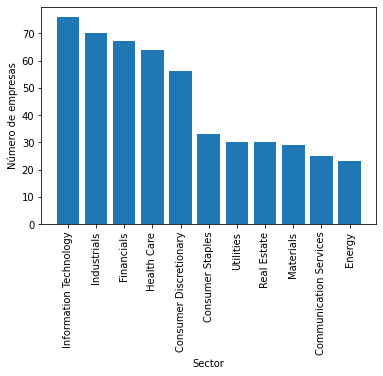

In [45]:
#Cantidad de empresas por sector

#Desglose 
print(df_SP500.GICS_Sector.value_counts())

#Grafico
sector_counts = df_SP500.GICS_Sector.value_counts()
plt.bar(sector_counts.index, sector_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Sector')
plt.ylabel('Número de empresas')
plt.show()

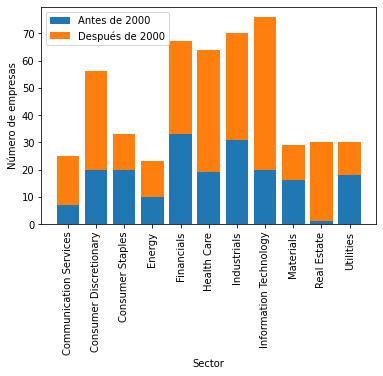

In [46]:
# Cantidad de empresas por sector por fecha de ingreso

# Filtro empresas que se agregaron antes del anio 2000
previo_2000 = df_SP500['Date_added'] < 2000

# Conteo empresas en cada sector y categoria
sector_counts_before = df_SP500[previo_2000].groupby('GICS_Sector')['Symbol'].count()
sector_counts_after = df_SP500[~previo_2000].groupby('GICS_Sector')['Symbol'].count()

# Grafico 
fig, ax = plt.subplots()
ax.bar(sector_counts_before.index, sector_counts_before.values, color='C0')
ax.bar(sector_counts_after.index, sector_counts_after.values, color='C1', bottom=sector_counts_before.values)
plt.xticks(rotation=90)
plt.xlabel('Sector')
plt.ylabel('Número de empresas')
ax.legend(['Antes de 2000', 'Después de 2000'], loc='upper left')
plt.show()

Date_added              False   True
GICS_Sector                         
Communication Services 28.00% 72.00%
Consumer Discretionary 36.00% 64.00%
Consumer Staples       61.00% 39.00%
Energy                 43.00% 57.00%
Financials             49.00% 51.00%
Health Care            30.00% 70.00%
Industrials            44.00% 56.00%
Information Technology 26.00% 74.00%
Materials              55.00% 45.00%
Real Estate             3.00% 97.00%
Utilities              60.00% 40.00%


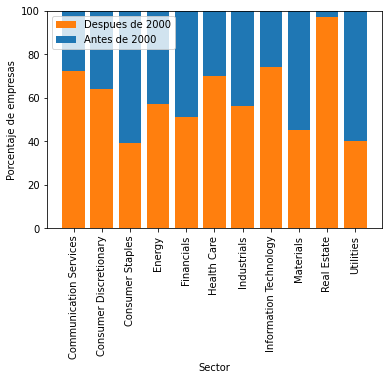

In [47]:
# Porcentaje de empresas por sector por fecha de ingreso

# Porcentaje de empresas que se agregaron antes y después del año 2000 para cada sector
sector_percentages = df_SP500.groupby(['GICS_Sector', df_SP500['Date_added'] >= 2000])['Symbol'].count().unstack()
sector_percentages['Total'] = sector_percentages.sum(axis=1)
sector_percentages = sector_percentages.div(sector_percentages['Total'], axis=0) * 100
sector_percentages.drop('Total', axis=1, inplace=True)

# Redeo porcentajes a dos decimales
sector_percentages = sector_percentages.round()

# Listado de los sectores con sus relaciones de porcentaje
print(sector_percentages.to_string(formatters={
    True: lambda x: f"{x:.2f}%",
    False: lambda x: f"{x:.2f}%"
}))

# Grafico
fig, ax = plt.subplots()
ax.bar(sector_percentages.index, sector_percentages[True], color='C1')
ax.bar(sector_percentages.index, sector_percentages[False], bottom=sector_percentages[True], color='C0')
plt.xticks(rotation=90)
plt.xlabel('Sector')
plt.ylabel('Porcentaje de empresas')
ax.legend(['Despues de 2000', 'Antes de 2000'], loc='upper left')
ax.set_ylim([0, 100])
plt.show()



### **Conclusion - parte 1**

- El sector '**Information Technology**' cuenta con una mayor participación en el índice S&P 500 (**76** empresas). <br>
- Solo **20** empresas de este sector (74% con respecto a las 76) fueron incluidas en índice antes del año 2000.
- Tomando en cuenta lo anterior, a partir de este punto continuaremos analizando **únicamente el sector Information Technology** ya que es el sector que más empresas ha ingresado al índice en los últimos 23 años.


### **Parte 2**

- Creación de un df con únicamente las empresas el sector IT
- Limpieza de datos para su procesamiento
- Cantidad de empresas por subsector
- Cantidad de empresas por subsector por fecha de ingreso
- Porcentaje de empresas por subsector por fecha de ingreso

In [48]:
#Creacion de un df con unicamente las empresar el sector IT.

df_IT = df_SP500[df_SP500.GICS_Sector == 'Information Technology'].reset_index(drop=True)


In [49]:
#Limpieza de datos para su procesamiento

#Eliminamos columnas que no utilizaremos
df_IT = df_IT.drop(columns=['Headquarters_Location', 'CIK', 'GICS_Sector'])

df_IT.columns = df_IT.columns.str.replace('-', '_')

#Correccion (normalizacion) de datos particulares dentro de la columan 'Founded'
df_IT.Founded = df_IT.Founded.replace('1928 (2011)', '1928')
df_IT.Founded = df_IT.Founded.replace('1939 (2015)', '1939')
df_IT.Founded = df_IT.Founded.replace('1975/1977 (1997)', '1975')
df_IT.Founded = df_IT.Founded.replace('2014 (1939)', '1939')

#Cambiamos de formato la columna 'Date_added' y nos quedamos unicamente con el anio
df_IT.Founded = pd.to_datetime(df_IT.Founded).dt.year

In [50]:
df_IT.head()

,Symbol,Security,GICS_Sub_Industry,Date_added,Founded
0,ACN,Accenture,IT Consulting & Other Services,2011,1989
1,ADBE,Adobe Inc.,Application Software,1997,1982
2,ADP,ADP,Data Processing & Outsourced Services,1981,1949
3,AKAM,Akamai,Internet Services & Infrastructure,2007,1998
4,AMD,AMD,Semiconductors,2017,1969


In [51]:
#Visualizacion de sub-sectores
subsectores = df_IT.GICS_Sub_Industry.unique()
for subsector in subsectores:
    print(subsector)

IT Consulting & Other Services
Application Software
Data Processing & Outsourced Services
Internet Services & Infrastructure
Semiconductors
Electronic Components
Technology Hardware, Storage & Peripherals
Semiconductor Equipment
Communications Equipment
Technology Distributors
Systems Software
Electronic Equipment & Instruments
Electronic Manufacturing Services


Semiconductors                                15
Application Software                          13
Data Processing & Outsourced Services         11
IT Consulting & Other Services                 6
Technology Hardware, Storage & Peripherals     6
Semiconductor Equipment                        5
Communications Equipment                       5
Electronic Equipment & Instruments             5
Electronic Components                          3
Systems Software                               3
Internet Services & Infrastructure             2
Technology Distributors                        1
Electronic Manufacturing Services              1
Name: GICS_Sub_Industry, dtype: int64


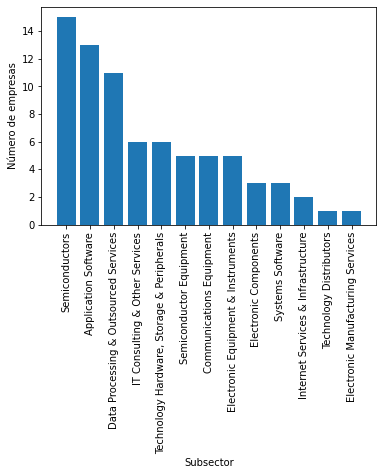

In [52]:
#Cantidad de empresas por subsector

#Desglose 
print(df_IT.GICS_Sub_Industry.value_counts())

#Grafico
subsector_counts = df_IT.GICS_Sub_Industry.value_counts()
plt.bar(subsector_counts.index, subsector_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Subsector')
plt.ylabel('Número de empresas')
plt.show()

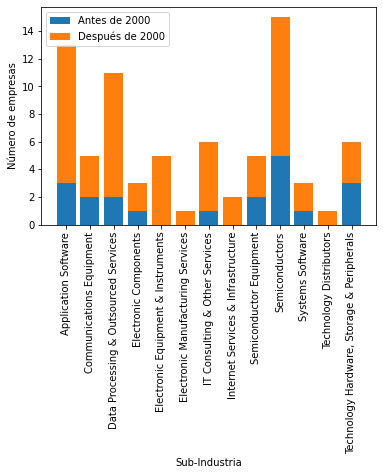

In [53]:
# Cantidad de empresas por subsector por fecha de ingreso

# Filtro empresas que se agregaron antes del año 2000
previo_2000 = df_IT['Date_added'] < 2000

# Conteo empresas en cada subsector y fecha de ingreso
sector_counts_before = df_IT[previo_2000].groupby('GICS_Sub_Industry')['Symbol'].count()
sector_counts_after = df_IT[~previo_2000].groupby('GICS_Sub_Industry')['Symbol'].count()

# Reindexar arrays para asegurar que tengan los mismos índices
sector_counts_before = sector_counts_before.reindex(sector_counts_after.index, fill_value=0)
sector_counts_after = sector_counts_after.reindex(sector_counts_before.index, fill_value=0)

# Graficar
fig, ax = plt.subplots()
ax.bar(sector_counts_before.index, sector_counts_before.values, color='C0')
ax.bar(sector_counts_after.index, sector_counts_after.values, color='C1', bottom=sector_counts_before.values)
plt.xticks(rotation=90)
plt.xlabel('Sub-Industria')
plt.ylabel('Número de empresas')
ax.legend(['Antes de 2000', 'Después de 2000'], loc='upper left')
plt.show()


Date_added                                  False    True
GICS_Sub_Industry                                        
Application Software                       23.00%  77.00%
Communications Equipment                   40.00%  60.00%
Data Processing & Outsourced Services      18.00%  82.00%
Electronic Components                      33.00%  67.00%
Electronic Equipment & Instruments            NaN 100.00%
Electronic Manufacturing Services             NaN 100.00%
IT Consulting & Other Services             17.00%  83.00%
Internet Services & Infrastructure            NaN 100.00%
Semiconductor Equipment                    40.00%  60.00%
Semiconductors                             33.00%  67.00%
Systems Software                           33.00%  67.00%
Technology Distributors                       NaN 100.00%
Technology Hardware, Storage & Peripherals 50.00%  50.00%


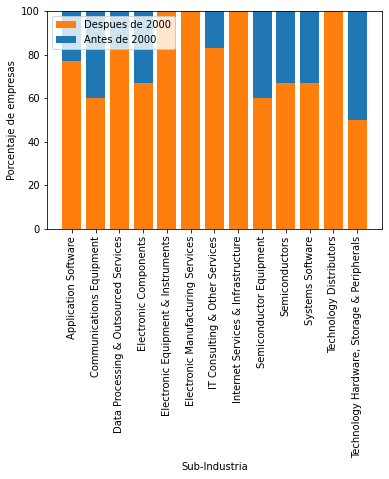

In [54]:
# Porcentaje de empresas por subsector por fecha de ingreso

# Porcentaje de empresas que se agregaron antes y después del año 2000 para cada subsector
subsector_percentages = df_IT.groupby(['GICS_Sub_Industry', df_IT['Date_added'] >= 2000])['Symbol'].count().unstack()
subsector_percentages['Total'] = subsector_percentages.sum(axis=1)
subsector_percentages = subsector_percentages.div(subsector_percentages['Total'], axis=0) * 100
subsector_percentages.drop('Total', axis=1, inplace=True)

# Redeo porcentajes a dos decimales
subsector_percentages = subsector_percentages.round()

# Listado de los subsectores con sus relaciones de porcentaje
print(subsector_percentages.to_string(formatters={
    True: lambda x: f"{x:.2f}%",
    False: lambda x: f"{x:.2f}%"
}))

# Grafico
fig, ax = plt.subplots()
ax.bar(subsector_percentages.index, subsector_percentages[True], color='C1')
ax.bar(subsector_percentages.index, subsector_percentages[False], bottom=subsector_percentages[True], color='C0')
plt.xticks(rotation=90)
plt.xlabel('Sub-Industria')
plt.ylabel('Porcentaje de empresas')
ax.legend(['Despues de 2000', 'Antes de 2000'], loc='upper left')
ax.set_ylim([0, 100])
plt.show()


### **Conclusion - parte 2**

- El subsector **'Semiconductors'** tiene una mayor participación en el sector de la Tecnología de la Información con **15 empresas**.
- Es importante destacar que este subsector tiene un balance adecuado a mi juicio, ya que dos terceras partes de las empresas han sido agregadas desde el año 2000. Lo que indica que es un subsector con un mercado en constante crecimiento.
- Sumando que, si solo contamos las empresas agregadas antes del 2000, 'Semiconductors' sigue siendo el subsector con más empresas.
- A partir de este punto, analizaremos **únicamente el subsector 'Semiconductors**'.


### **Parte 3**

- Creación de un df con únicamente las empresas del subsector Semiconductors
- Creación columnas para pasos finales

Realizaremos 3 pasos para seleccionar nuestro top 3 de empresas:
- Eliminaremos las 5 empresas con menor antigüedad desde su fundación
- Organizaremos las 10 empresas sobrantes por los años que tardaron en ser agregadas al índice S&P 500
- Elegiremos el **top 3**

In [55]:
#Creación de un DataFrame con únicamente las empresas del subsector Semiconductors
df_SC = df_IT[df_IT.GICS_Sub_Industry == 'Semiconductors'].reset_index(drop=True)

In [56]:
#Creación columnas para pasos finales
df_SC['Years_existing'] = 2023 - df_SC['Founded']
df_SC['Years_added'] = 2023 - df_SC['Date_added']
df_SC['Years_until_added'] = df_SC['Years_existing'] - df_SC['Years_added']


In [57]:
#Descarga para su uso en el Dashboard
df_SC.to_csv('semiconductors.csv', index=False)

In [58]:
df_SC

,Symbol,Security,GICS_Sub_Industry,Date_added,Founded,Years_existing,Years_added,Years_until_added
0,AMD,AMD,Semiconductors,2017,1969,54,6,48
1,ADI,Analog Devices,Semiconductors,1999,1965,58,24,34
2,AVGO,Broadcom Inc.,Semiconductors,2014,1961,62,9,53
3,FSLR,First Solar,Semiconductors,2022,1999,24,1,23
4,INTC,Intel,Semiconductors,1976,1968,55,47,8
5,MCHP,Microchip Technology,Semiconductors,2007,1989,34,16,18
6,MU,Micron Technology,Semiconductors,1994,1978,45,29,16
7,MPWR,Monolithic Power Systems,Semiconductors,2021,1997,26,2,24
8,NVDA,Nvidia,Semiconductors,2001,1993,30,22,8
9,NXPI,NXP Semiconductors,Semiconductors,2021,1953,70,2,68


In [59]:
#Eliminaremos las 5 empresas con menor antiguedad desde su fundacion

# Ordenar el DataFrame por Years_existing
df_SC = df_SC.sort_values(by=['Years_existing'])

# Eliminar las primeras 5 filas
df_SC = df_SC.iloc[5:]

In [60]:
df_SC

,Symbol,Security,GICS_Sub_Industry,Date_added,Founded,Years_existing,Years_added,Years_until_added
8,NVDA,Nvidia,Semiconductors,2001,1993,30,22,8
5,MCHP,Microchip Technology,Semiconductors,2007,1989,34,16,18
12,QCOM,Qualcomm,Semiconductors,1999,1985,38,24,14
6,MU,Micron Technology,Semiconductors,1994,1978,45,29,16
0,AMD,AMD,Semiconductors,2017,1969,54,6,48
4,INTC,Intel,Semiconductors,1976,1968,55,47,8
1,ADI,Analog Devices,Semiconductors,1999,1965,58,24,34
2,AVGO,Broadcom Inc.,Semiconductors,2014,1961,62,9,53
9,NXPI,NXP Semiconductors,Semiconductors,2021,1953,70,2,68
14,TXN,Texas Instruments,Semiconductors,1985,1930,93,38,55


In [61]:
#Organizaremos las 10 empresas sobrantes por los anios que se tardaron en ser agregadas al indice S&P 500

# Ordenar el DataFrame por Years_existing
df_SC = df_SC.sort_values(by=['Years_until_added'])

df_SC = df_SC.reset_index(drop=True)

In [62]:
df_SC

,Symbol,Security,GICS_Sub_Industry,Date_added,Founded,Years_existing,Years_added,Years_until_added
0,NVDA,Nvidia,Semiconductors,2001,1993,30,22,8
1,INTC,Intel,Semiconductors,1976,1968,55,47,8
2,QCOM,Qualcomm,Semiconductors,1999,1985,38,24,14
3,MU,Micron Technology,Semiconductors,1994,1978,45,29,16
4,MCHP,Microchip Technology,Semiconductors,2007,1989,34,16,18
5,ADI,Analog Devices,Semiconductors,1999,1965,58,24,34
6,AMD,AMD,Semiconductors,2017,1969,54,6,48
7,AVGO,Broadcom Inc.,Semiconductors,2014,1961,62,9,53
8,TXN,Texas Instruments,Semiconductors,1985,1930,93,38,55
9,NXPI,NXP Semiconductors,Semiconductors,2021,1953,70,2,68


In [63]:
#Eligiremos el top 3
# Eliminar las primeras 5 filas
df_SC = df_SC.iloc[:3]

In [64]:
df_SC = df_SC.sort_values(by=['Years_added'], ascending=False)
df_SC

,Symbol,Security,GICS_Sub_Industry,Date_added,Founded,Years_existing,Years_added,Years_until_added
1,INTC,Intel,Semiconductors,1976,1968,55,47,8
2,QCOM,Qualcomm,Semiconductors,1999,1985,38,24,14
0,NVDA,Nvidia,Semiconductors,2001,1993,30,22,8


### **Conclusion - parte 3**

- Después de analizar las 15 empresas del subsector 'Semiconductors', realizamos 3 pasos para elegir nuestro top 3 de empresas: 

- Se descartaron las **5** empresas con menor antigüedad considerando el año de su fundación.
- Se reordenaron las **10** empresas sobrantes por los años que tardaron en ser agregadas al índice S&P 500. 
- Seleccionamos el **top 3** resultante:


   ---  **Intel** --- **Qualcomm** --- **Nvidia**




In [ ]:
df_SC

,Symbol,Security,GICS_Sub_Industry,Date_added,Founded,Years_existing,Years_added,Years_until_added
1,INTC,Intel,Semiconductors,1976,1968,55,47,8
2,QCOM,Qualcomm,Semiconductors,1999,1985,38,24,14
0,NVDA,Nvidia,Semiconductors,2001,1993,30,22,8


### **Parte 4**

- Instalación de la liberia yfnance.
-Descarga de la información historia de las 3 empresas seleccionadas con una periodicidad diaria desde el 2000 hasta el 2023
-Realizaremos nuestro análisis únicamente considerando el precio de cierre y volumen de las acciones en movimiento de ese dia
- Visualizamos el comportamiento del precio
- Visualizamos el comportamiento del volumen
- Revisamos la correlación que existe en el precio y volumen
-Al término de nuestro análisis podremos determinar el rendimiento de crecimiento de las 3 acciones
- Nuestra recomendación será una distribución de inversión del 50/30/20 dependiendo su rendimiento.

In [65]:
df_SC

,Symbol,Security,GICS_Sub_Industry,Date_added,Founded,Years_existing,Years_added,Years_until_added
1,INTC,Intel,Semiconductors,1976,1968,55,47,8
2,QCOM,Qualcomm,Semiconductors,1999,1985,38,24,14
0,NVDA,Nvidia,Semiconductors,2001,1993,30,22,8


In [ ]:
pip install yfinance

In [67]:
import yfinance as yf
import pandas as pd

#Creamos una lista con nuestros top 3
tickers = df_SC.Symbol.tolist()

# Descargar los datos de cada empresa
start_date = '2000-01-01'
end_date = '2023-02-22'

#Descargamos en un diccionario
data = {}
for ticker in tickers:
    data[ticker] = yf.download(ticker, start=start_date, end=end_date)


# Convertir el diccionario en un DataFrame
df_top3 = pd.concat([data[ticker].assign(Symbol=ticker) for ticker in tickers])
df_top3 = df_top3.reset_index()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [68]:
df_top3.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol
0,2000-01-03,41.632812,43.6875,41.62500,43.50000,25.317579,57710200,INTC
1,2000-01-04,42.718750,43.9375,41.12500,41.46875,24.135372,51019600,INTC
2,2000-01-05,41.500000,42.9375,40.25000,41.81250,24.335432,52389000,INTC
3,2000-01-06,40.875000,41.6875,39.09375,39.37500,22.916782,55171200,INTC
4,2000-01-07,38.750000,41.0000,38.68750,41.00000,23.862547,41096400,INTC


In [69]:
#Eliminamos las columnas que no vamos a usar
df_top3.drop(['Open', 'High','Low','Adj Close'], axis=1, inplace=True)

In [70]:
#Descarga para su uso en el Dashboard
df_top3.to_csv('top3.csv', index=False)

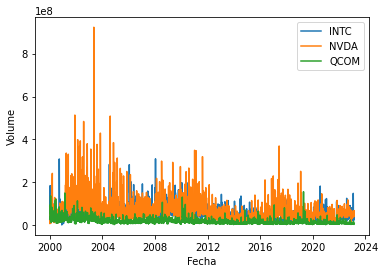

In [71]:
import matplotlib.pyplot as plt

# Agrupar los datos por símbolo
groups = df_top3.groupby("Symbol")

# Crear una figura y un conjunto de ejes
fig, ax = plt.subplots()

# Trazar cada grupo por separado
for name, group in groups:
    ax.plot(group["Date"], group["Volume"], label=name)

# Configurar la leyenda y las etiquetas de los ejes
ax.legend()
ax.set_xlabel("Fecha")
ax.set_ylabel("Volume")

# Mostrar la gráfica
plt.show()


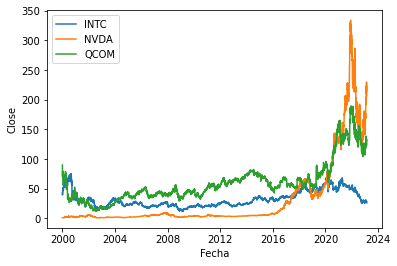

In [72]:
import matplotlib.pyplot as plt

# Agrupar los datos por símbolo
groups = df_top3.groupby("Symbol")

# Crear una figura y un conjunto de ejes
fig, ax = plt.subplots()

# Trazar cada grupo por separado
for name, group in groups:
    ax.plot(group["Date"], group["Close"], label=name)

# Configurar la leyenda y las etiquetas de los ejes
ax.legend()
ax.set_xlabel("Fecha")
ax.set_ylabel("Close")

# Mostrar la gráfica
plt.show()

In [73]:
# Calcular la correlación entre las variables "Close" y "Volume"
corr = df_top3["Close"].corr(df_top3["Volume"])

# Imprimir el resultado
print("La correlación entre Close y Volumen es: ", corr)

La correlación entre Close y Volumen es:  -0.32588349276718476


In [74]:
df_top3.head()

,Date,Close,Volume,Symbol
0,2000-01-03,43.50000,57710200,INTC
1,2000-01-04,41.46875,51019600,INTC
2,2000-01-05,41.81250,52389000,INTC
3,2000-01-06,39.37500,55171200,INTC
4,2000-01-07,41.00000,41096400,INTC


In [77]:
#Formato de fecha
df_top3['Date'] = pd.to_datetime(df_top3['Date'])

#Día de la semana
df_top3['day_of_week'] = df_top3['Date'].dt.day_name()

#Promedio de cierre
mean_by_day = df_top3.groupby('day_of_week')['Close'].mean()

#Busco el día con el precio más bajo
day_with_low_mean = mean_by_day.idxmin()

print("El día de la semana con el precio promedio de cierre más bajo es:", day_with_low_mean)


El día de la semana con el precio promedio de cierre más bajo es: Monday


In [78]:
mean_by_day

day_of_week
Friday       40.621648
Monday       40.501959
Thursday     40.806782
Tuesday      40.911232
Wednesday    40.772521
Name: Close, dtype: float64

In [79]:
#Descarga para su uso en el Dashboard
mean_by_day.to_csv("promedio_precios.csv")

### **Conclusion - parte 4**

- Después de analizar los gráficos visualmente podemos llegar a este orden de rendimiento:
1. Nvidia
2. Qualcomm
3. Intel

- Obtuvimos una correlación del -0.3259 entre el precio de cierre y volumen de transacciones. lo que indica una correlación negativa moderada. Esto significa que cuando los precios de cierre (Close) aumentan, es probable que el volumen de negociación (Volume) disminuya, y viceversa. Sin embargo, la correlación no implica necesariamente causalidad, por lo que es importante interpretar estos resultados con precaución.

- Nuestra recomendación de inversión se desglosa de la siguiente manera:
1. Nvidia 50%
2. Qualcomm 30%
3. Intel 20%
- Según la data, en promedio el día que conviene comprar nuestras acciones es el día Lunes. Ya que el histórico indica que es el día con el precio más bajo.